# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
adverts_df = pd.read_csv('Advertising.csv')

In [ ]:
adverts_df.head()

In [6]:
adverts_df = adverts_df.drop('Unnamed: 0', axis=1)

In [7]:
# Check the columns and first few rows
adverts_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# Get the 5-point statistics for data 
adverts_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
# Describe the contents of this dataset
# 200 data points for TV, radio, and newspaper, and sales
# TV has a mean of 147 std of 85.9
# radio is mean 23.3, std 14.8
# newspaper is mean 30.6, std 21.8
# sales (the target) is mean 14.0, stf 5.2

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

In [9]:
# For all the variables, check if they hold normality assumption
import seaborn as sns

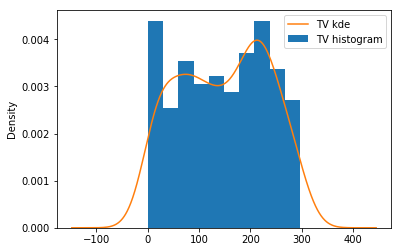

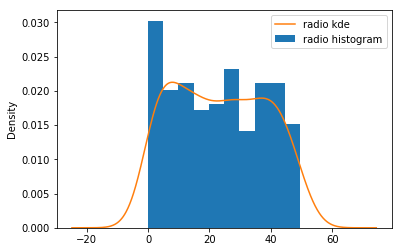

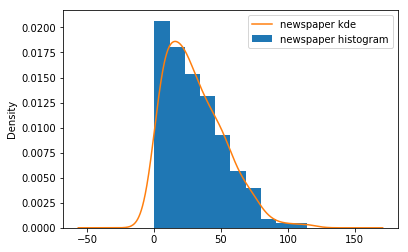

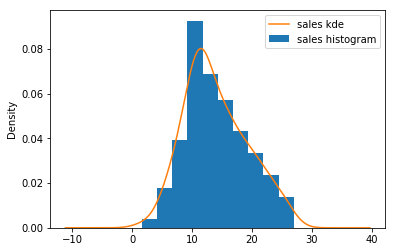

In [21]:
for column in adverts_df:
    adverts_df[column].plot.hist(density=True, label=column+' histogram')
    adverts_df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

In [ ]:
# Record your observations on normality here 

# None of the above are particularly normal.
# TV and radio both have two peaks, but they are central and not very diff x's
# Newspaper is positively skewed. It has a mode at the negative extreme
# sales is the most normally distributed, but still positively skewed

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

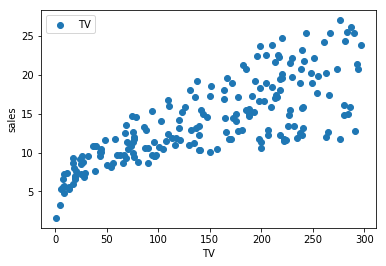

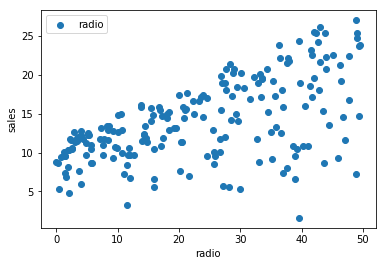

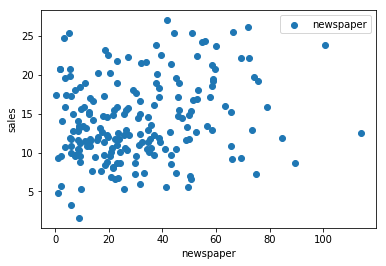

In [23]:
# visualize the relationship between the preditors and the target using scatterplots
target = adverts_df['sales']

for column in ['TV', 'radio', 'newspaper']:
    plt.scatter(adverts_df[column], target, label=column)
    plt.ylabel('sales')
    plt.xlabel(column)
    plt.legend()
    plt.show()

In [ ]:
# Record yor observations on linearity here 

# All show a positive relationship
# All of them look more linear the lower the x-value
# and becomes less linear and more spread out the higher the x-value
# most linear is TV, least linear is newspaper

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [24]:
# build the formula 
f = 'sales~TV'

# create a fitted model in one line
model = ols(formula=f, data=adverts_df).fit()

### Step 5: Get regression diagnostics summary


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           1.47e-42
Time:                        16:42:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"


Note here that the coefficients represent associations, not causations


### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [26]:
# create a DataFrame with the minimum and maximum values of TV
tv_min_max_df = pd.DataFrame({
                'TV': [adverts_df['TV'].min(), adverts_df['TV'].max()],
})
tv_min_max_df

,TV
0,0.7
1,296.4


In [27]:
# make predictions for those x values and store them
predictions = model.predict(tv_min_max_df)
predictions

0     7.065869
1    21.122454
dtype: float64

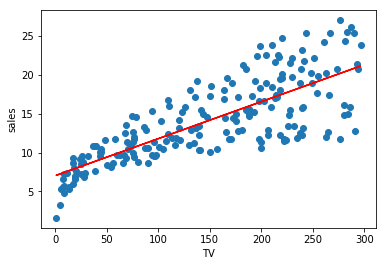

In [36]:
# first, plot the observed data and the least squares line
plt.scatter(adverts_df['TV'], adverts_df['sales'])
plt.plot(adverts_df['TV'], model.predict(adverts_df['TV']), color='red')
plt.ylabel('sales')
plt.xlabel('TV')
plt.show()

### Step 7: Visualize the error term for variance and heteroscedasticity

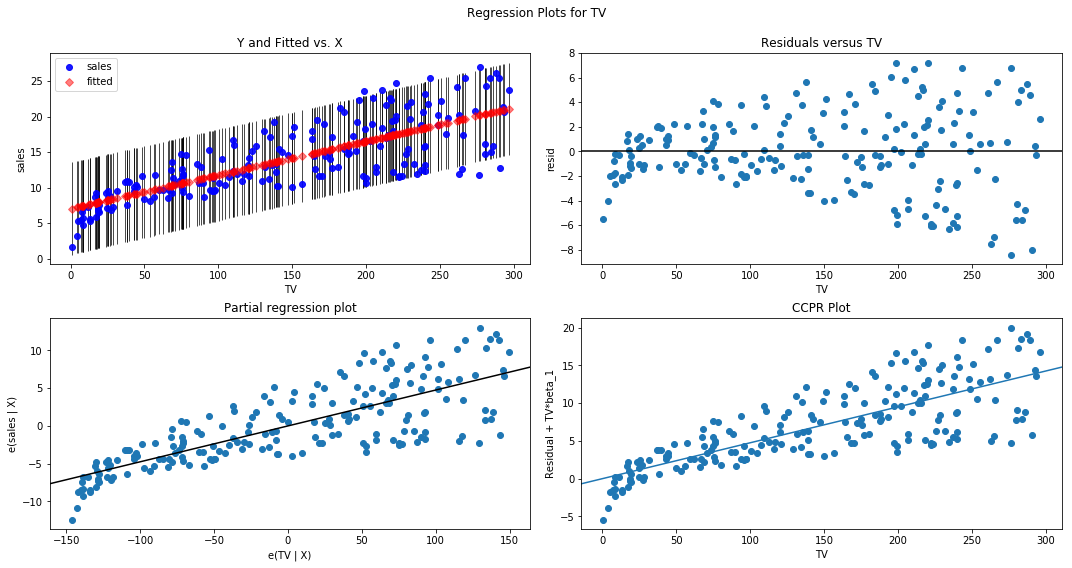

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'TV', fig=fig)

In [ ]:
# Record Your observations on residuals

# Residuals are not following homoscedasticity. 
# This breaks an assumption that allows use to use linear regression

### Next, repeat above for radio and go through the same process, recording your observations

In [38]:
f2 = 'sales~radio'

In [40]:
model2 = ols(formula=f2, data=adverts_df).fit()

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           4.35e-19
Time:                        16:55:22   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Oberservations: r-squared value is fairly low

In [42]:
radio_min_max_df = pd.DataFrame({
                    'radio': [adverts_df['radio'].min(), adverts_df['radio'].max()]
})
radio_min_max_df

,radio
0,0.0
1,49.6


In [44]:
radio_pred = model2.predict(radio_min_max_df)
radio_pred

0     9.311638
1    19.355429
dtype: float64

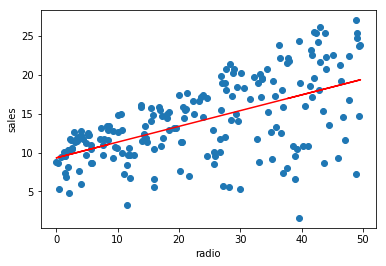

In [47]:
plt.scatter(adverts_df['radio'], adverts_df['sales'])
plt.plot(adverts_df['radio'], model2.predict(adverts_df['radio']), color='red')
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()

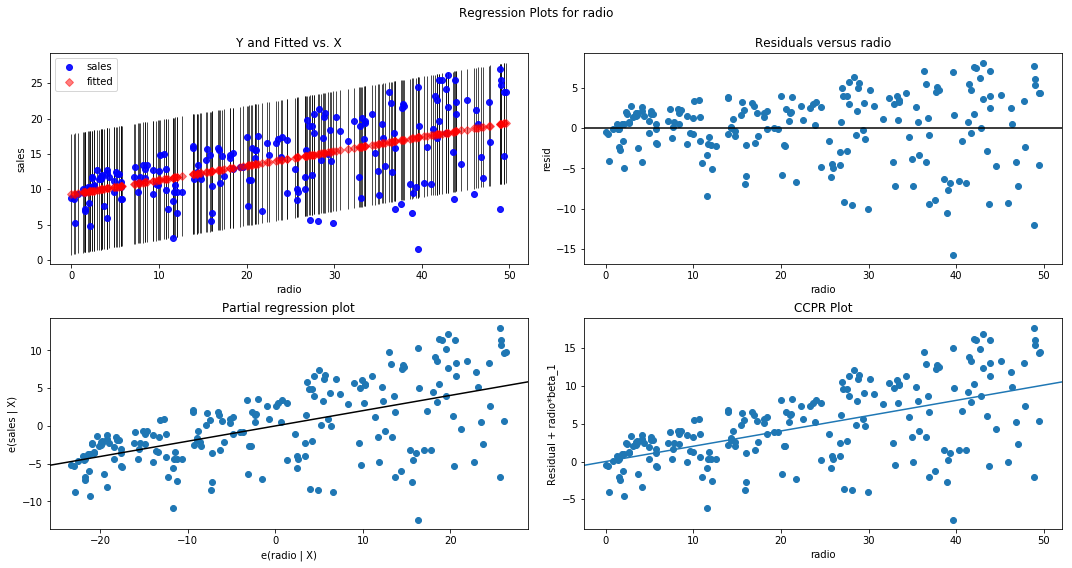

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, 'radio', fig=fig)

In [ ]:
# like TV the residuals are showing heteroscedasticity with breaks assumptions

In [79]:
# Record your observations here for goodness of fit 

#

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 